## Installation instructions

Hands-on practice will rely on a (fairly large) number of python packages for NLP and deep learning. If you are running on Google colaboratory, most of these packages are installed in the default environment and there's not much to do. If you want to run on your machine, you will have to install a number of things following the instructions below. Should be fairly straightforward but requires a bit of disk space.

Open a shell window and follow the commands below (not sure exactly how to do that on Windows).

### Step 1. Set up a virtual environment (optional but recommanded)

> export LANG=en_US.UTF-8
> python -m venv ./nlp.env
> source ./nlp.env.bin.activate

If you want to deactivate the virtual environment at some point, simply type deactivate.


### Step 2. Add your virtual environment as a kernel in jupyter

> pip install ipykernel
> python -m ipykernel install --user --name=NLP

You can now run your jupyter notebook where you'll see a NLP kernel. But it's empy as of now so we need to install a bunch of things first. 

### Step 3. Install the necessary packages

From your favorite shell, virtual environment activated, you can add the followng package (might take some time):

> pip install ntlk
> pip install spacy
> pip install transformers
> pip install scikit-learn
> pip install matplotlib

You need to install spaCy's processing pipeline resources also. This also holds for colaboratory where you will have to run the following command in the first cell and reload the kernel.

> python -m spacy download en_core_web_md

You also need to install a number of NLTK resources that we will use. No need to restart the kernel.

> python -m nltk.downloader wordnet
> python -m nltk.downloader sentiwordnet
> python -m nltk.downloader averaged_perceptron_tagger

## Play with tokenization with different toolkits

In [ ]:
# Let's start with NLTK, one of the most popular toolkit for NLP. 
# See https://www.nltk.org/ for details.

from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
#
# Let's play a bit with the notion of tokenization
#

# a basic tokenization of a text
s='A $2 example\nof a sentence. And a 2nd sentence. i found my books for less than €50,- on amazon.com, you can find loads of products there. hond kat waarom '
print([token for token in word_tokenize(s)])

# Now combining sentence tokenization with word tokenization
print([word_tokenize(x) for x in sent_tokenize(s)])

# ========================================================
# TODO
#
# You're turn to play a bit and try to fool the tokenizer

['A', '$', '2', 'example', 'of', 'a', 'sentence', '.', 'And', 'a', '2nd', 'sentence', '.', 'i', 'found', 'my', 'books', 'for', 'less', 'than', '€50', ',', '-', 'on', 'amazon.com', ',', 'you', 'can', 'find', 'loads', 'of', 'products', 'there', '.', 'hond', 'kat', 'waarom']
[['A', '$', '2', 'example', 'of', 'a', 'sentence', '.'], ['And', 'a', '2nd', 'sentence', '.'], ['i', 'found', 'my', 'books', 'for', 'less', 'than', '€50', ',', '-', 'on', 'amazon.com', ',', 'you', 'can', 'find', 'loads', 'of', 'products', 'there', '.'], ['hond', 'kat', 'waarom']]


In [ ]:
# Let's try with spaCy now, another popular toolkit that comes with full processing
# pipelines that do a lot of things. Tokenization is one of the thing spaCy does but
# pipelines do a lot more than that. We'll get back to this later on, only looking 
# into the tokenization step as of now. See https://spacy.io/ for details.

# Load spaCy's English NLP pipeline
import spacy
process = spacy.load('en_core_web_md')

/home/gonem/miniforge3/envs/ENSAI/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392036766/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
#
# Let's play again with the tokenizer embedded in the processing pipeline that spaCy implements (more details later)
#

print([token for token in process(s)])

# ========================================================
# TODO
#
# You're turn to play a bit and see how it behaves on the examples you played with previously

[A, $, 2, example, 
, of, a, sentence, ., And, a, 2nd, sentence, ., i, found, my, books, for, less, than, €, 50,-, on, amazon.com, ,, you, can, find, loads, of, products, there, ., hond, kat, waarom]


In [ ]:
# Let's try a third one that is currently being used with deep transformer models.

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tokens = tokenizer.tokenize(s)
print(tokens)

tokens = tokenizer.tokenize("But transformers require a limited number of tokens to be efficient.")
print(tokens)

# ========================================================
# TODO
#
# What do you observe on the tokenization of the last sentence? 

['A', '$', '2', 'example', 'of', 'a', 'sentence', '.', 'And', 'a', '2nd', 'sentence', '.', 'i', 'found', 'my', 'books', 'for', 'less', 'than', '€', '##50', ',', '-', 'on', 'am', '##az', '##on', '.', 'com', ',', 'you', 'can', 'find', 'loads', 'of', 'products', 'there', '.', 'ho', '##nd', 'ka', '##t', 'wa', '##aro', '##m']
['But', 'transform', '##ers', 'require', 'a', 'limited', 'number', 'of', 'token', '##s', 'to', 'be', 'efficient', '.']


### Lexical analysis: mophology and morphosyntax

In the following cells, we will

In [ ]:
#
# NLTK has a number of tools to perform stemming, lemmatization and POS tagging to play with
#
# We start by importing the tools we want to play with in the next cell
# 

from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


In [ ]:
#
# Examples of a basic stemmer and lemmatizer that takes isolated wordforms and
# convert them to the corresponding stem/lemma.
#

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print("{:10}   {:10}   {:10}".format('word', 'stem', 'lemma'))
print("----------------------------------")
for w in ('candy', 'candies', 'loves', 'loved', 'lovely', 'argued', 'arguing'):
    print("{:10}   {:10}   {:10}".format(w, stemmer.stem(w), lemmatizer.lemmatize(w)))

# Now, what if we pass on a POS information to the lemmatizer?
print("\nlemma of the verb 'argued':", lemmatizer.lemmatize('argued', pos=wordnet.VERB))
print("lemma of the verb 'arguing':", lemmatizer.lemmatize('arguing', pos=wordnet.VERB))

# Examples of a POS tagger

# POS tagging
s = 'The cat sat on the mat and had a couple of fishes for dinner.'
tokens = word_tokenize(s)
tags = pos_tag(tokens)
print('\nSentence:', s)
print('Tokens:', tokens)
print('POS Tag', tags) # if we want only tags: [x[1] for x in tags]

# ========================================================
# TODO
# 
# Your turn to play a bit with these three steps and try to fool them. 
# What does POS tagging do with semantically ambiguous sentences?


# GOING FURTHER
#
# One can combine NLTK's POS tagger and WordNetLemmatizer to create a function that converts
# an input sentence to a list of tokens with their corresponding POS tags and lemmas. However
# not totally straightforward.
#
# See https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python 


word         stem         lemma     
----------------------------------
candy        candi        candy     
candies      candi        candy     
loves        love         love      
loved        love         loved     
lovely       love         lovely    
argued       argu         argued    
arguing      argu         arguing   

lemma of the verb 'argued': argue
lemma of the verb 'arguing': argue

Sentence: The cat sat on the mat and had a couple of fishes for dinner.
Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat', 'and', 'had', 'a', 'couple', 'of', 'fishes', 'for', 'dinner', '.']
POS Tag [('The', 'DT'), ('cat', 'NN'), ('sat', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('mat', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('a', 'DT'), ('couple', 'NN'), ('of', 'IN'), ('fishes', 'NNS'), ('for', 'IN'), ('dinner', 'NN'), ('.', '.')]


In [ ]:
#
# We can do it all at once with spaCy's pipeline that does tokenization and 
# POS tagging and lemmatization (and a few other things)
#

res = process(s)            # -> apply pipeline on text

for token in res:           # -> iterate over tokens in doc
  print('{:8} {:6} {:4} {}'.format(token.text, token.pos_, token.tag_, token.lemma_))

#
# You can also do it with long texts and multiple sentences
#
s = 'The cat sat on the mat. He had a couple of fishes for dinner.'
res = process(s)

for sent in res.sents:
    print('\nSentence:', sent)
    for token in sent:
        print('{:8} {:6} {:4} {}'.format(token.text, token.pos_, token.tag_, token.lemma_))


The      DET    DT   the
cat      NOUN   NN   cat
sat      VERB   VBD  sit
on       ADP    IN   on
the      DET    DT   the
mat      NOUN   NN   mat
and      CCONJ  CC   and
had      VERB   VBD  have
a        DET    DT   a
couple   NOUN   NN   couple
of       ADP    IN   of
fishes   NOUN   NNS  fish
for      ADP    IN   for
dinner   NOUN   NN   dinner
.        PUNCT  .    .

Sentence: The cat sat on the mat.
The      DET    DT   the
cat      NOUN   NN   cat
sat      VERB   VBD  sit
on       ADP    IN   on
the      DET    DT   the
mat      NOUN   NN   mat
.        PUNCT  .    .

Sentence: He had a couple of fishes for dinner.
He       PRON   PRP  he
had      VERB   VBD  have
a        DET    DT   a
couple   NOUN   NN   couple
of       ADP    IN   of
fishes   NOUN   NNS  fish
for      ADP    IN   for
dinner   NOUN   NN   dinner
.        PUNCT  .    .


### Syntaxtic analysis and dependency trees

In [ ]:
process2 = spacy.load('fr_core_news_md')


In [ ]:
xr = process2('Le chat boit le lait.')

for token in xr:
    print('{:8} {:6} {:8} {:6}'.format(token.text, token.pos_, token.lemma_, token.dep_))
   

spacy.displacy.render(xr, style="dep", jupyter=True)  

# ========================================================
# TODO
# 
# Your turn to play a bit with syntactic analysis and enter new sentences, possibly complex ones. The example 
# here is in French but you can obviously do the same with the English pipeline (replace process2 by process).
#

Le       DET    le       det   
chat     NOUN   chat     nsubj 
boit     VERB   boire    ROOT  
le       DET    le       det   
lait     NOUN   lait     obj   
.        PUNCT  .        punct 


### Word representations and lexical semantics

We will play with the two main ways of representing lexical semantics: 
- word nets, encoding word senses and enconding lexical relations such as homonymy, synonymy, hyperonymy, hyponymy, etc. 
- distributional semantics as encoded by word embeddings

#### Playing with word net

We we look at what's encoded in wordnet and play a bit with the senses of the token 'rat'. You can get more
information on word net from https://wordnet.princeton.edu

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
#
# We start by playing with the senses associated to a token (under the form of sets of synonyms (ala synsets),
# then play with one of the senses to see what associated information we can get from the word sense. 
#

word = "rat"

print(f"Senses of the token '{word}' are:")
for s in wn.synsets(word):
    print("   {:25} {}".format(str(s), s.definition()))


print(f"\nSenses of the noun '{word}' are:")
for s in wn.synsets(word, pos=wn.NOUN):
    print("   {:25} {}".format(str(s), s.definition()))

# now let's focus on the rat as an animal and see what are the relations
name = 'rat.n.01'
synset = wn.synset(name)

# we can list lemmas 
print("\nLemmas referring to '{}':".format(name), [str(lemma.name()) for lemma in synset.lemmas()])
print("Lemmas referring to 'dog.n.01':", [str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()])

# we can get lexical relations such as 
print("\nHypernyms of '{}':".format(name))
for s in synset.hypernyms():
    print("   {:25} {}".format(str(s), s.definition()))

print("Hyponyms of '{}':".format(name))
for s in synset.hyponyms():
    print("   {:25} {}".format(str(s), s.definition()))

# ========================================================
# TODO
# 
# Try another token and/or synset
#

Senses of the token 'rat' are:
   Synset('rat.n.01')        any of various long-tailed rodents similar to but larger than a mouse
   Synset('scab.n.01')       someone who works (or provides workers) during a strike
   Synset('rotter.n.01')     a person who is deemed to be despicable or contemptible
   Synset('informer.n.01')   one who reveals confidential information in return for money
   Synset('rat.n.05')        a pad (usually made of hair) worn as part of a woman's coiffure
   Synset('rat.v.01')        desert one's party or group of friends, for example, for one's personal advantage
   Synset('rat.v.02')        employ scabs or strike breakers in
   Synset('fink.v.01')       take the place of work of someone on strike
   Synset('rat.v.04')        give (hair) the appearance of being fuller by using a rat
   Synset('rat.v.05')        catch rats, especially with dogs
   Synset('denounce.v.04')   give away information about somebody

Senses of the noun 'rat' are:
   Synset('rat.n.01')  

In [ ]:
#
# We can use the graph of hypernyms/hyponyms (and a few other ones) to compare two senses
#

name1 = 'rat.n.01'
synset1 = wn.synset(name1)

name2 = 'mammal.n.01'
synset2 = wn.synset(name2)

lch = synset1.lowest_common_hypernyms(synset2)
sim = synset1.wup_similarity(synset2)

print("Distance between '{}' and '{}' is {:.2f} with lowest common ancestor(s):".format(name1, name2, sim))
for s in lch:
    print("   {:25} {}".format(str(s), s.definition()))

    
# ========================================================
# TODO
# 
# Try a few other pairs, e.g., searching for senses closer to either 'rat.n.01' or 'man.n.01'. What
# happens if we take a hyperonym/hyponym? Another sense of the token 'rat'?
#

Distance between 'rat.n.01' and 'mammal.n.01' is 0.87 with lowest common ancestor(s):
   Synset('mammal.n.01')     any warm-blooded vertebrate having the skin more or less covered with hair; young are born alive except for the small subclass of monotremes and nourished with milk


#### Playing with word embeddings

Word embedding is a form of distributional semantics, in particular for models that were designed with an 
explicit distributional hypothesis such as word2vec, glove, fasttext. We will use the word embeddings that are encoded within spaCy's pipeline. 

spaCy's pipeline comes with a "vocabulary", .e.g, the list of tokens that can be processed. We can access to the tokens of the vocabulary and to embedded vectors for the tokens. For the English and French pipelines, these are fastext vectors from Explosion: cf. https://github.com/explosion/spacy-vectors-builder.



In [ ]:
#
# Let's start by playing a bit with a few vectors, see what dimension they have and how they can 
# be used to compute semantic similarity between two tokens.

# get access to the pipeline's vocabulary
vocab = process.vocab 

# get three tokens from the vocabulary
token1 = vocab['apple']
token2 = vocab['orange']
token3 = vocab['car']

# check that a token has an embedded representation and the dimension of the embedded space
if token1.has_vector == True:
    print('Embedding size is', len(token1.vector))
dim = len(token1.vector)

print("distance between tokens 'apple' and 'orange' is {:.3f}".format(token1.similarity(token2)))
print("distance between tokens 'apple' and 'car' is {:.3f}".format(token1.similarity(token3)))

# ========================================================
# TODO
# 
# You can verify that the distance between the tokens is indeed the cosine similarity between the 
# two corresponding vectors.
#
# Tips: in numpy (as np), np.norm() is the norm of a vector, np.linalg.dot(v1,v2) provides the dot
# product between the two vectors. 
      

Embedding size is 300
distance between tokens 'apple' and 'orange' is 0.614
distance between tokens 'apple' and 'car' is 0.120


We will now visualize a scatter plot of the vectors for the words that are in simlex. Simlex lists pairs of words along with human judgement of how semantically related (not exactly the same as similar) they are on a scale from 0 (least similar) to 10 (most similar):

love sex 6.77 
tiger cat 7.35
tiger tiger 10
book paper 7.46
computer keyboard 7.62
computer internet 7.58

We will load the simlex file, list the words/tokens therein and do a scatter plot of the word embeddings with t-SNE using scitkit learn TSNE() module.

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# !wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/simlex-1.csv

#
# Load simlex data from csv file
#
import csv

simlex = []
with open('simlex-1.csv', 'r') as f:
    for row in csv.DictReader(f):
      simlex.append([row['Word 1'], row['Word 2'], row['Human (mean)']])
print('loaded', len(simlex), 'pairs')

wordlist = list(set([x[0] for x in simlex] + [x[1] for x in simlex]))
nwords = len(wordlist)
print('simlex contains', nwords, 'different words/tokens')

#
# scikit learn TSNE() takes as input either the list of vectors in a nwordsxdim matrix,
# or the list of distances (not similarity) between individual points as a nwordsxnwords
# symetric matrix. In the first case, one must provide the appropriate distance function
# between vectors. We will rather go with the second option taking advantage of the 
# similarity() function of spaCy. Last, what we need is a matrix with pairwise distances
# between words, not similarities! In other words d(x,x)=0, not 1. Cosine similarities are 
# between -1 (opposite directions) and 1 (same direction), the last case corresponding to
# a null distance. We thus defined d(x,y) = 1 - cos(x,y). 
#
X = np.empty((nwords, nwords), dtype='float32')
for i in range(nwords):
  X[i,:] = [1 - vocab[wordlist[i]].similarity(vocab[x]) for x in wordlist]

# dirty hack because some  cosine similarities are slightly below -1 (inperfect arithmetic in computers)
c = np.where(X < 0)
for i in range(len(c[0])):
  X[c[0][i], c[1][i]] = 0.0

# run t-SNE 2D projection
Y = TSNE(n_components=2, metric='precomputed', init='random', random_state=0, method='exact').fit_transform(X)
print('Shape of the projection Y:', Y.shape)



loaded 153 pairs
simlex contains 173 different words/tokens
Shape of the projection Y: (173, 2)


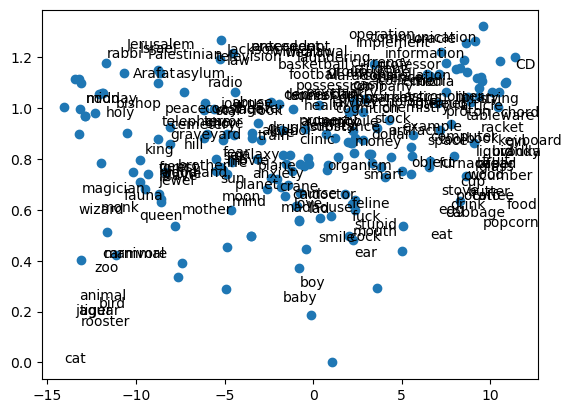

In [35]:
#
# TODO: visualize the scatter plot of points in Y, printing the corresponding words. This can be done with
# plt.annotate('word', xy=(x_coord,y_cord)) to place the string 'word' at (x_coord,y_cord)
#
plt.scatter(Y[:,0], X[:,1])
for i in range(len(wordlist)):
    plt.annotate(wordlist[i], xy=(Y[i,0], X[i,0]))